In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/9 [==>...........................] - ETA: 40s - loss: 1.9733 - accuracy: 0.1250
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 6s 114ms/step - loss: 1.9236 - accuracy: 0.1620 - val_loss: 1.7836 - val_accuracy: 0.2203
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.8549 - accuracy: 0.1875
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 1.8246 - accuracy: 0.2213 - val_loss: 1.7140 - val_accuracy: 0.4492
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.8255 - accuracy: 0.2266
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 1.7458 - accuracy: 0.2797 - val_loss: 1.6549 - val_accuracy: 0.5791
Epoch 4/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.7802 - accuracy: 0.2188
Epoch 4: s

9/9 [==============================] - 0s 22ms/step - loss: 0.9218 - accuracy: 0.6573 - val_loss: 0.6976 - val_accuracy: 0.8051
Epoch 29/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.9515 - accuracy: 0.6250
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 28ms/step - loss: 0.8767 - accuracy: 0.6770 - val_loss: 0.6736 - val_accuracy: 0.8136
Epoch 30/1000
8/9 [=========================>....] - ETA: 0s - loss: 0.8704 - accuracy: 0.6680
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 0.8695 - accuracy: 0.6676 - val_loss: 0.6536 - val_accuracy: 0.8079
Epoch 31/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.8161 - accuracy: 0.6797
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 0.8472 - accuracy: 0.6798 - val_loss: 0.

Epoch 56/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6384 - accuracy: 0.7344
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 23ms/step - loss: 0.6155 - accuracy: 0.7637 - val_loss: 0.4199 - val_accuracy: 0.8503
Epoch 57/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.7045 - accuracy: 0.7109
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 0.6093 - accuracy: 0.7618 - val_loss: 0.4128 - val_accuracy: 0.8559
Epoch 58/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5691 - accuracy: 0.7891
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 23ms/step - loss: 0.6170 - accuracy: 0.7693 - val_loss: 0.4062 - val_accuracy: 0.8588
Epoch 59/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5807 - accuracy: 0.7969
Epoch

1/9 [==>...........................] - ETA: 0s - loss: 0.4536 - accuracy: 0.8594
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 21ms/step - loss: 0.5274 - accuracy: 0.7947 - val_loss: 0.3231 - val_accuracy: 0.8814
Epoch 84/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4845 - accuracy: 0.8359
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 25ms/step - loss: 0.5427 - accuracy: 0.7740 - val_loss: 0.3212 - val_accuracy: 0.8842
Epoch 85/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.6023 - accuracy: 0.7656
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 0.5282 - accuracy: 0.7806 - val_loss: 0.3165 - val_accuracy: 0.8927
Epoch 86/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5790 - accuracy: 0.7500
Epoch 86: saving mo

1/9 [==>...........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.8516
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 0.4877 - accuracy: 0.8041 - val_loss: 0.2719 - val_accuracy: 0.9068
Epoch 111/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4641 - accuracy: 0.7891
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 26ms/step - loss: 0.4847 - accuracy: 0.8117 - val_loss: 0.2733 - val_accuracy: 0.9096
Epoch 112/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4964 - accuracy: 0.7812
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 0.4844 - accuracy: 0.8023 - val_loss: 0.2745 - val_accuracy: 0.9068
Epoch 113/1000
9/9 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 0.7985
Epoch 113: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.4382 - accuracy: 0.8281
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 23ms/step - loss: 0.4848 - accuracy: 0.8098 - val_loss: 0.2454 - val_accuracy: 0.9124
Epoch 138/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4653 - accuracy: 0.8125
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 0.4549 - accuracy: 0.8107 - val_loss: 0.2429 - val_accuracy: 0.9181
Epoch 139/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4517 - accuracy: 0.8359
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 0.4407 - accuracy: 0.8277 - val_loss: 0.2416 - val_accuracy: 0.9124
Epoch 140/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4980 - accuracy: 0.7812
Epoch 140: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.4825 - accuracy: 0.7812
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 0.4269 - accuracy: 0.8352 - val_loss: 0.2125 - val_accuracy: 0.9181
Epoch 165/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4142 - accuracy: 0.8281
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 20ms/step - loss: 0.4305 - accuracy: 0.8277 - val_loss: 0.2137 - val_accuracy: 0.9181
Epoch 166/1000
8/9 [=========================>....] - ETA: 0s - loss: 0.4434 - accuracy: 0.8242
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 26ms/step - loss: 0.4415 - accuracy: 0.8230 - val_loss: 0.2163 - val_accuracy: 0.9237
Epoch 167/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5185 - accuracy: 0.7891
Epoch 167: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.8516
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 0.4147 - accuracy: 0.8475 - val_loss: 0.2030 - val_accuracy: 0.9209
Epoch 192/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.8594
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 20ms/step - loss: 0.4080 - accuracy: 0.8493 - val_loss: 0.2004 - val_accuracy: 0.9237
Epoch 193/1000
9/9 [==============================] - ETA: 0s - loss: 0.4058 - accuracy: 0.8371
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 25ms/step - loss: 0.4058 - accuracy: 0.8371 - val_loss: 0.1996 - val_accuracy: 0.9266
Epoch 194/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3784 - accuracy: 0.8203
Epoch 194: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.3928 - accuracy: 0.8203
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 0.4012 - accuracy: 0.8399 - val_loss: 0.1913 - val_accuracy: 0.9266
Epoch 219/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3743 - accuracy: 0.8438
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 23ms/step - loss: 0.3750 - accuracy: 0.8522 - val_loss: 0.1904 - val_accuracy: 0.9266
Epoch 220/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4424 - accuracy: 0.7891
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 20ms/step - loss: 0.3998 - accuracy: 0.8399 - val_loss: 0.1925 - val_accuracy: 0.9294
Epoch 221/1000
9/9 [==============================] - ETA: 0s - loss: 0.3803 - accuracy: 0.8456
Epoch 221: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.8828
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 0.3671 - accuracy: 0.8616 - val_loss: 0.1790 - val_accuracy: 0.9294
Epoch 246/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4814 - accuracy: 0.8047
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 0.4065 - accuracy: 0.8588 - val_loss: 0.1779 - val_accuracy: 0.9294
Epoch 247/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3184 - accuracy: 0.8906
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 0.3810 - accuracy: 0.8701 - val_loss: 0.1785 - val_accuracy: 0.9266
Epoch 248/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.8438
Epoch 248: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.3953 - accuracy: 0.8750
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 0.3595 - accuracy: 0.8842 - val_loss: 0.1721 - val_accuracy: 0.9294
Epoch 273/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.8672
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 26ms/step - loss: 0.3632 - accuracy: 0.8748 - val_loss: 0.1706 - val_accuracy: 0.9294
Epoch 274/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4327 - accuracy: 0.8438
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 26ms/step - loss: 0.3700 - accuracy: 0.8644 - val_loss: 0.1700 - val_accuracy: 0.9294
Epoch 275/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3289 - accuracy: 0.8828
Epoch 275: sa

1/9 [==>...........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.8516
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 23ms/step - loss: 0.3688 - accuracy: 0.8719 - val_loss: 0.1656 - val_accuracy: 0.9294
Epoch 300/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4504 - accuracy: 0.8125
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 0.3715 - accuracy: 0.8550 - val_loss: 0.1666 - val_accuracy: 0.9294
Epoch 301/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4190 - accuracy: 0.8281
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 0.3606 - accuracy: 0.8644 - val_loss: 0.1662 - val_accuracy: 0.9294
Epoch 302/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3560 - accuracy: 0.8516
Epoch 302: sa

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 16ms/step - loss: 0.1662 - accuracy: 0.9322


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 330ms/step
[1.6137733e-04 2.9090644e-04 2.2552783e-02 2.7557129e-01 6.4268221e-05
 7.0135939e-01]
5


# Confusion matrix

12/12 [==============================] - 0s 3ms/step


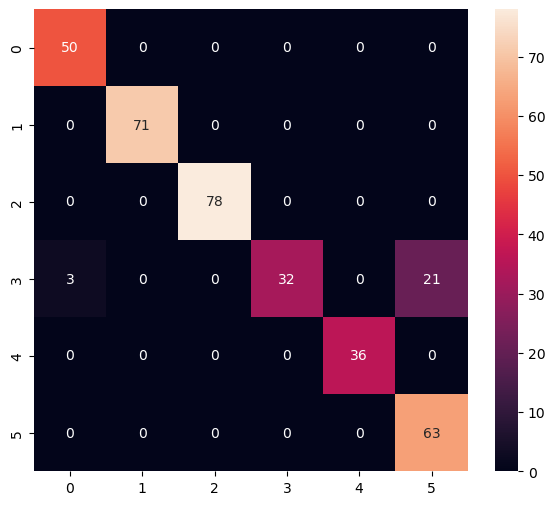

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        78
           3       1.00      0.57      0.73        56
           4       1.00      1.00      1.00        36
           5       0.75      1.00      0.86        63

    accuracy                           0.93       354
   macro avg       0.95      0.93      0.93       354
weighted avg       0.95      0.93      0.93       354



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\jasha\AppData\Local\Temp\tmp6pvp81hr\assets


INFO:tensorflow:Assets written to: C:\Users\jasha\AppData\Local\Temp\tmp6pvp81hr\assets


6632

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 14.5 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.6137735e-04 2.9090626e-04 2.2552785e-02 2.7557132e-01 6.4268293e-05
 7.0135945e-01]
5
